# Imports

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter

plt.rcParams["figure.figsize"] = (15,10)

covid_df = pd.read_csv('datasets/covid_DF.csv')
gp_df = pd.read_csv('datasets/gp_DF.csv')
mgr_df = pd.read_csv('datasets/mgr_DF.csv')

gp_text = gp_df["text"].tolist()
migranti_text = mgr_df["text"].tolist()

# Covid DF

Raw Covid table

In [10]:
covid_df = covid_df.drop(columns=['Unnamed: 0'])
covid_df

,created,text,fav_count,retw_count,source,index
0,2021-11-09 14:48:14,"L'Europa è attesa da un inverno ""duro"" per l'a...",16,10,agenzia_ansa,0
1,2021-11-09 14:39:15,A Singapore le persone che non sono vaccinate ...,155,36,agenzia_ansa,0
2,2021-11-09 10:59:59,Torna a risalire in Italia la percentuale di p...,18,10,agenzia_ansa,0
3,2021-11-09 09:20:53,La Russia supera la soglia dei 1.200 morti in ...,29,11,agenzia_ansa,0
4,2021-11-08 17:25:57,FLASH | Sono 4.197 i positivi ai test Covid in...,18,8,agenzia_ansa,0
...,...,...,...,...,...,...
1984,2021-12-02 14:45:01,"#Covid, mappa Ecdc: tutta l'Ue è rossa, zone g...",1,2,qn_giorno,1
1985,2021-12-02 10:44:59,"#Covid #Israele sconsiglia viaggi all'estero, ...",1,0,qn_giorno,1
1986,2021-12-02 09:13:49,"#Covid, Vaccino AstraZeneca, team di esperti: ...",1,1,qn_giorno,1
1987,2021-12-02 07:14:13,Ammortizzatori e #cassa #Covid improvviso aume...,2,1,qn_giorno,1


In [11]:
#covid_df['created'] = covid_df['created'].map(lambda x: str(x)[:-9])
days = pd.DatetimeIndex(covid_df['created']).day
days

Int64Index([9, 9, 9, 9, 8, 8, 8, 8, 9, 8,
            ...
            1, 3, 2, 2, 2, 2, 2, 2, 2, 1],
           dtype='int64', name='created', length=1989)

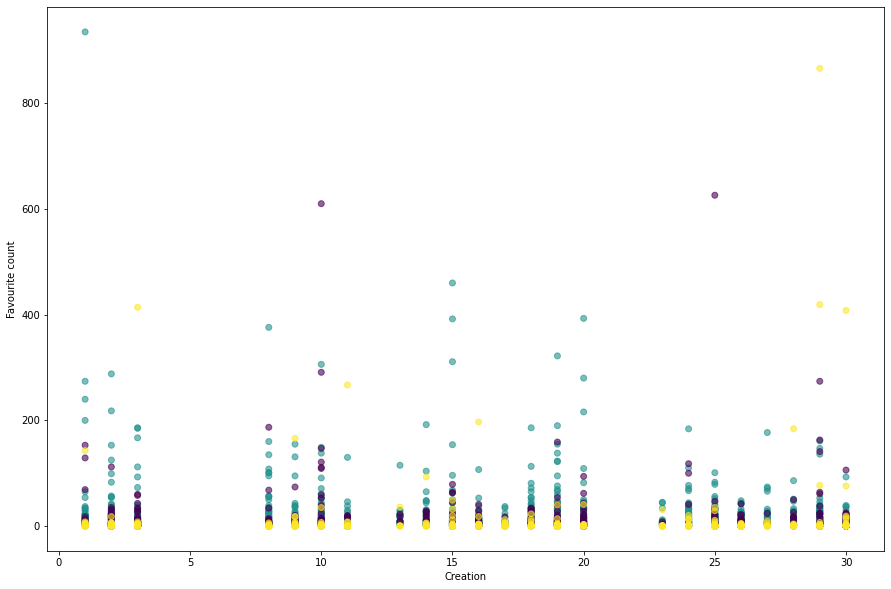

In [12]:
plt.scatter(days,covid_df['fav_count'], c=covid_df['index'], alpha = 0.6)
plt.xlabel('Creation')
plt.ylabel('Favourite count')
plt.show()

In [13]:
def tweets_per_day(df):
    return pd.DatetimeIndex(df['created']).day.value_counts().sort_index()

tweets_day = tweets_per_day(covid_df)
#print(tweets_day)

In [14]:
def tweets_per_hour(df):
    return pd.DatetimeIndex(df['created']).hour.value_counts().sort_index()

tweets_hour = tweets_per_hour(covid_df)
#print(tweets_hour)

In [15]:
hours = pd.DatetimeIndex(covid_df['created']).hour
#hours

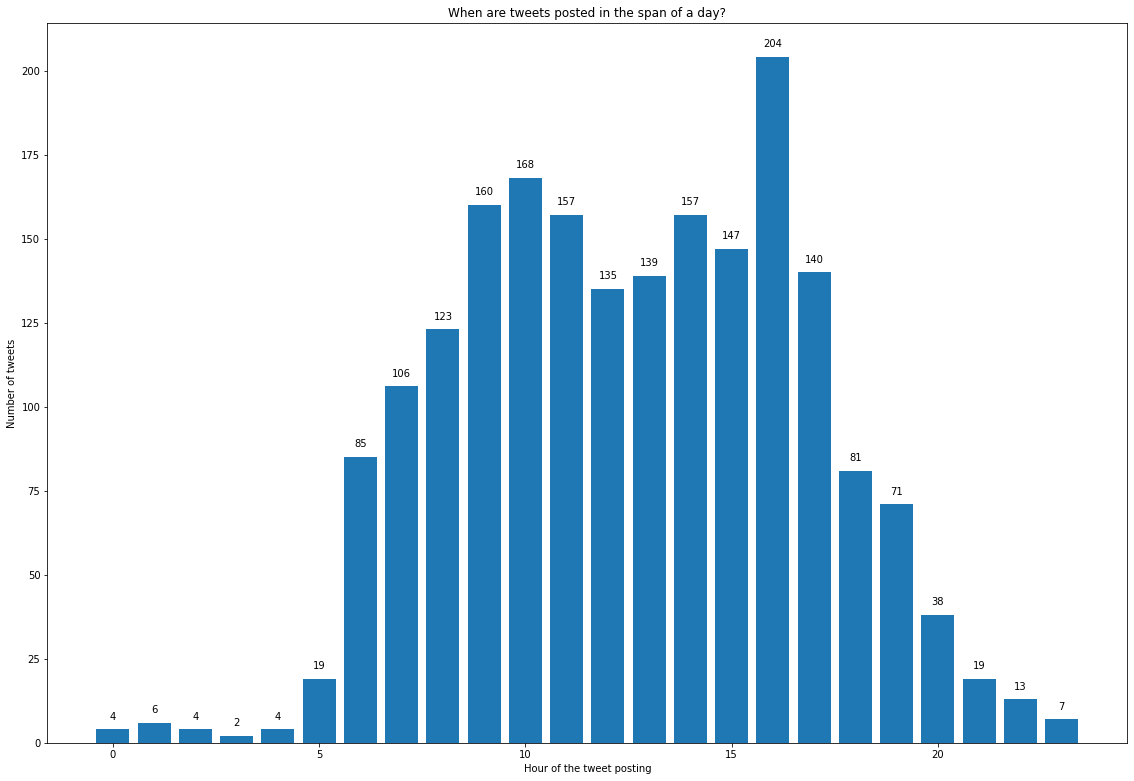

In [21]:
hoursNum = np.arange(0,24)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(hoursNum,tweets_hour)
plt.title("When are tweets posted in the span of a day?")
ax.set_xlabel('Hour of the tweet posting')
ax.set_ylabel('Number of tweets')

# zip joins x and y coordinates in pairs
for x,y in zip(hoursNum,tweets_hour):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

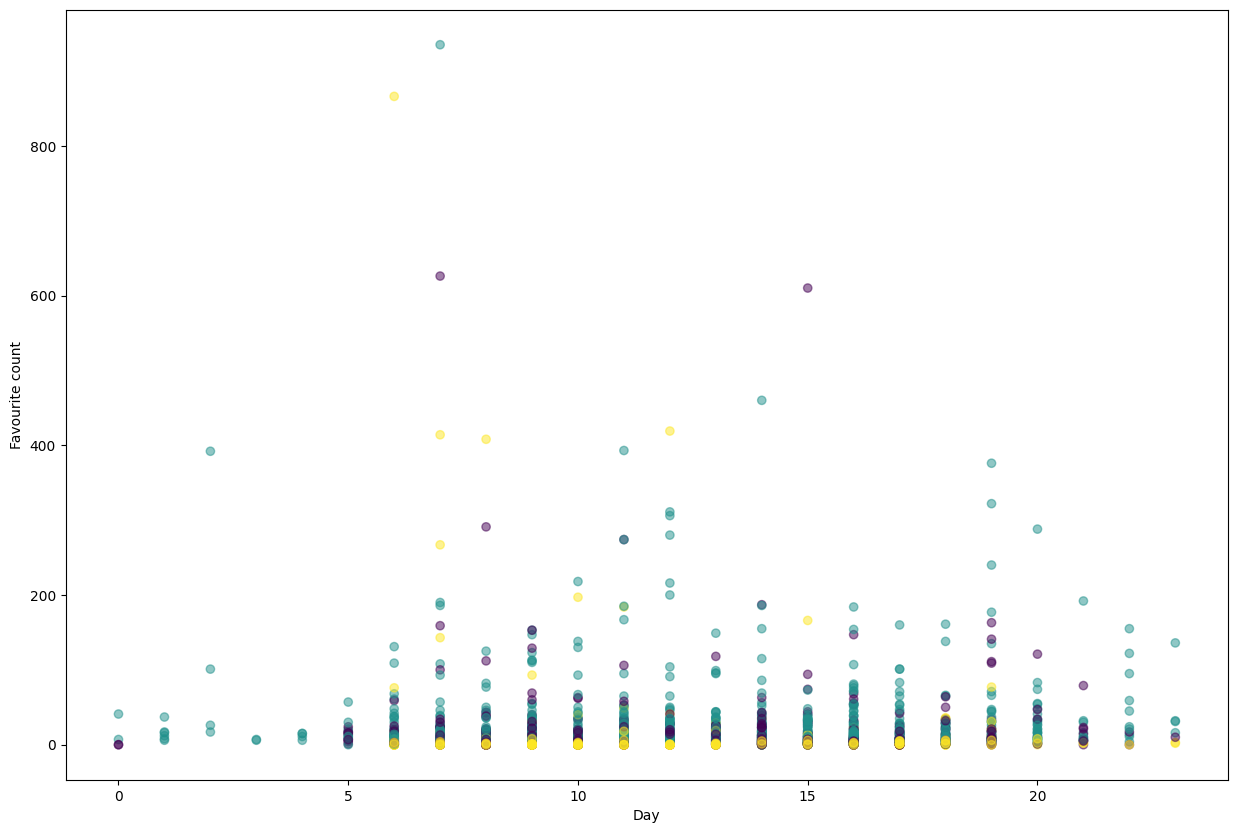

In [ ]:
plt.scatter(hours,covid_df['fav_count'], c=covid_df['index'], alpha = 0.5)
plt.xlabel('Day')
plt.ylabel('Favourite count')
plt.show()

Tweets count by Index

In [ ]:
covid_index_count = covid_df.groupby('index').count()
covid_sx_count = covid_index_count['created'][-1]
covid_center_count = covid_index_count['created'][0]
covid_dx_count = covid_index_count['created'][1]
covid_index_count

,created,text,fav_count,retw_count,source
index,,,,,
-1,551,551,551,551,551
0,996,996,996,996,996
1,442,442,442,442,442


# Green Pass DF

Raw Green pass table

In [ ]:
gp_df = gp_df.drop(columns=['Unnamed: 0'])
gp_df

,created,text,fav_count,retw_count,source,index
0,2021-11-09 10:42:50,"#NoGreenPass, stop alle manifestazioni all’int...",49,14,rainews,0
1,2021-11-09 08:56:29,RT @RaiStudio24: A. #Fontana (@FontanaPres) Pr...,0,1,rainews,0
2,2021-11-09 13:02:57,"No Green pass, stretta del Viminale: stop ai c...",36,6,mediasettgcom24,0
3,2021-11-09 13:00:08,"No Green pass, stretta del Viminale: stop ai c...",18,3,mediasettgcom24,0
4,2021-11-09 12:57:09,"No Green pass, stretta del Viminale: stop ai c...",17,1,mediasettgcom24,0
...,...,...,...,...,...,...
468,2021-12-02 07:28:18,Non controllavano il Green pass ai clienti sed...,8,0,gazzettino,1
469,2021-12-01 14:24:19,"Green pass, forze dell'ordine sui #bus per ver...",0,2,gazzettino,1
470,2021-12-03 13:14:39,Come ottenere il Super Green pass https://t.co...,0,0,qn_carlino,1
471,2021-12-02 13:14:23,"Green pass super, da quando vale e come si sca...",1,1,qn_carlino,1


Tweets count by Index

In [ ]:
gp_index_count = gp_df.groupby('index').count()
gp_sx_count = gp_index_count['created'][-1]
gp_center_count = gp_index_count['created'][0]
gp_dx_count = gp_index_count['created'][1]
gp_index_count

,created,text,fav_count,retw_count,source
index,,,,,
-1,215,215,215,215,215
0,158,158,158,158,158
1,100,100,100,100,100


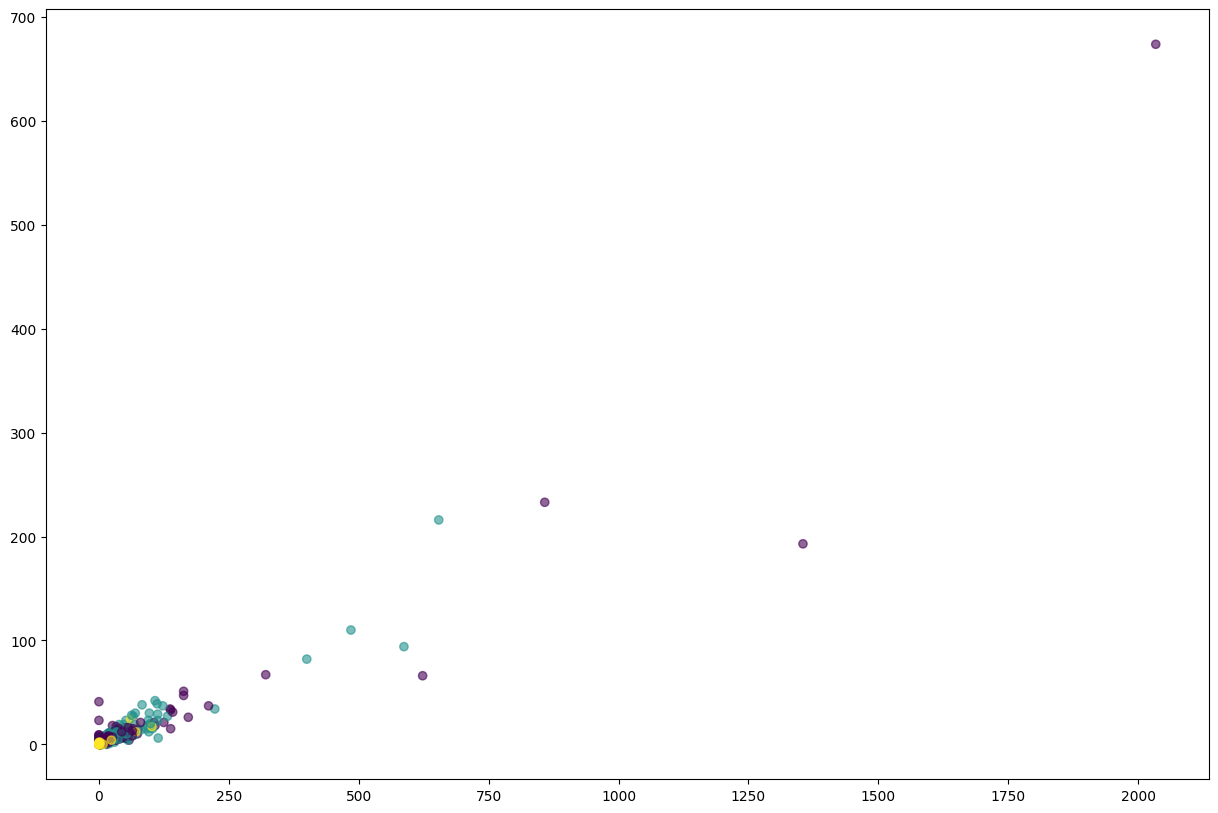

In [ ]:
plt.scatter(gp_df['fav_count'],gp_df['retw_count'], c=gp_df['index'], alpha = 0.6)
plt.show()

# Migranti DF

Raw Migrants table

In [ ]:
mgr_df = mgr_df.drop(columns=['Unnamed: 0'])
mgr_df

,created,text,fav_count,retw_count,source,index
0,2021-11-09 07:28:30,"La Germania esorta l'Unione europea ad ""agire""...",75,28,agenzia_ansa,0
1,2021-11-08 13:16:39,VIDEO | L'esodo dei migranti che ha tentato di...,25,16,agenzia_ansa,0
2,2021-11-09 09:19:21,Così la #Bielorussia porta i #migranti in Euro...,9,7,agenzia_italia,0
3,2021-11-08 17:13:53,La crisi al confine polacco con migliaia di #m...,15,9,agenzia_italia,0
4,2021-11-09 15:41:22,Ue: aggressione da regime illegittimo e disper...,18,8,rainews,0
...,...,...,...,...,...,...
219,2021-12-03 17:17:34,"Papa Francesco a Cipro: ""I lager ci sono anche...",22,3,repubblica,-1
220,2021-12-02 18:11:35,RT @eziomauro: Papa Francesco a Cipro e in Gre...,0,1,repubblica,-1
221,2021-12-03 09:54:41,Stati Uniti e Messico riattivano un programma ...,3,1,internazionale,-1
222,2021-12-03 08:51:44,"[VIDEO] ""Sulla crisi dei migranti serve più co...",3,1,ilfoglio_it,1


Tweets count by Index

In [ ]:
mgr_index_count = mgr_df.groupby('index').count()
mgr_sx_count = mgr_index_count['created'][-1]
mgr_center_count = mgr_index_count['created'][0]
mgr_dx_count = mgr_index_count['created'][1]
mgr_index_count

,created,text,fav_count,retw_count,source
index,,,,,
-1,89,89,89,89,89
0,106,106,106,106,106
1,29,29,29,29,29


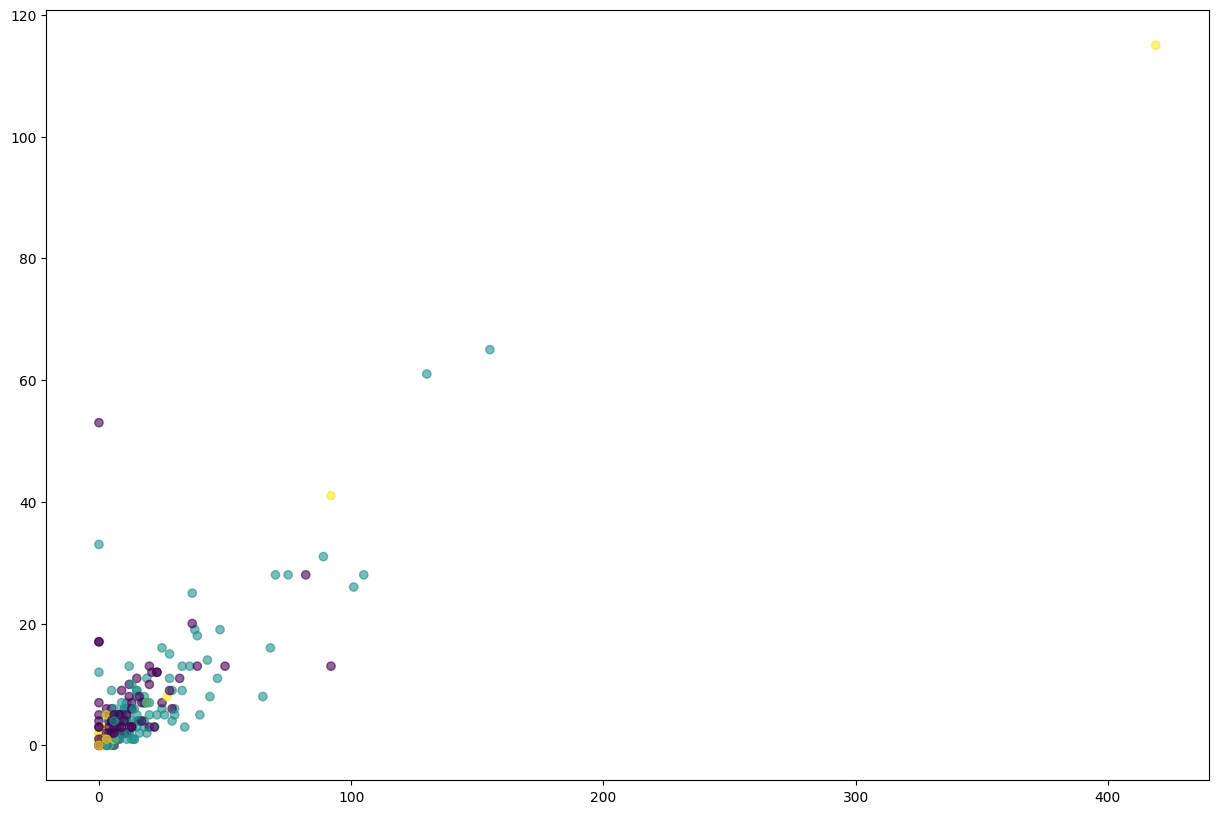

In [ ]:
plt.scatter(mgr_df['fav_count'],mgr_df['retw_count'], c=mgr_df['index'], alpha = 0.6)
plt.show()

# ML stuff

## Covid

In [ ]:
covid_text = covid_df["text"].tolist()
labels = covid_df['index']

train_data, test_data, train_labels, test_labels = train_test_split(covid_text, labels, test_size = 0.2, random_state = 1)

print("Training set: ",len(train_data))
print("Test set: ",len(test_data))

Training set:  1591
Test set:  398


In [ ]:
counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)

predictions = classifier.predict(test_counts)
print("Classifier accuracy: ",accuracy_score(test_labels, predictions))
print("Accuracy test:")
print(confusion_matrix(test_labels, predictions))

Classifier accuracy:  0.6130653266331658
Accuracy test:
[[ 43  69   6]
 [ 12 176   5]
 [ 22  40  25]]


In [ ]:
tweet = 'Il Covid si sta propagando in Europa'
tweet2 = 'Il governo dovrebbe fare qualcosa!'
tweet3 = 'Le mascherine si sono rivelate un fallimento'
tweet_counts = counter.transform([tweet, tweet2, tweet3])
print("Predictions: ",classifier.predict(tweet_counts))
print("Predictions probability: ")
print(classifier.predict_proba(tweet_counts))

Predictions:  [ 0 -1  0]
Predictions probability: 
[[0.14623878 0.68398026 0.16978096]
 [0.46986719 0.20909275 0.32104006]
 [0.12629549 0.75382217 0.11988235]]


## GP

In [ ]:
gp_text = gp_df["text"].tolist()
labels = gp_df['index']

train_data, test_data, train_labels, test_labels = train_test_split(gp_text, labels, test_size = 0.2, random_state = 1)

print("Training set: ",len(train_data))
print("Test set: ",len(test_data))

Training set:  378
Test set:  95


In [ ]:
counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)

predictions = classifier.predict(test_counts)
print("Classifier accuracy: ",accuracy_score(test_labels, predictions))
print("Accuracy test:")
print(confusion_matrix(test_labels, predictions))

Classifier accuracy:  0.6105263157894737
Accuracy test:
[[39  2  5]
 [13 17  0]
 [15  2  2]]


In [ ]:
tweet = 'Dovrebbero abolire il Green pass!'
tweet2 = 'La nuova certificazione ha creato problemi'
tweet3 = 'Il Green pass è la soluzione'
tweet_counts = counter.transform([tweet, tweet2, tweet3])
print("Predictions: ",classifier.predict(tweet_counts))
print("Predictions probability: ")
print(classifier.predict_proba(tweet_counts))

Predictions:  [-1 -1 -1]
Predictions probability: 
[[0.66591653 0.23761629 0.09646719]
 [0.70891494 0.12517664 0.16590842]
 [0.73502933 0.20368916 0.06128151]]


## Merge

In [ ]:
merge_df = pd.concat([covid_df, gp_df, mgr_df], axis=0)
#merge_df = merge_df.drop(columns=['Unnamed: 0'])

merge_text = merge_df["text"].tolist()
labels = merge_df['index']

train_data, test_data, train_labels, test_labels = train_test_split(merge_text, labels, test_size = 0.2, random_state = 1)

print("Training set: ",len(train_data))
print("Test set: ",len(test_data))

Training set:  2148
Test set:  538


In [ ]:
merge_df_sx = merge_df[merge_df["index"]==-1]
merge_df_c = merge_df[merge_df["index"]==0]
merge_df_dx = merge_df[merge_df["index"]==1]

merge_text_sx = merge_df_sx["text"].tolist()
merge_text_c = merge_df_c["text"].tolist()
merge_text_dx = merge_df_dx["text"].tolist()

In [ ]:
merge_index_count = merge_df.groupby('index').count()
merge_index_count

,created,text,fav_count,retw_count,source
index,,,,,
-1,855,855,855,855,855
0,1260,1260,1260,1260,1260
1,571,571,571,571,571


In [ ]:
counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)

predictions = classifier.predict(test_counts)
print("Classifier accuracy: ",accuracy_score(test_labels, predictions))
print("Accuracy test:")
print(confusion_matrix(test_labels, predictions))

Classifier accuracy:  0.6152416356877324
Accuracy test:
[[ 79  86   9]
 [ 39 225   5]
 [ 23  45  27]]


In [ ]:
tweet = 'Dovrebbero abolire il Green pass!'
tweet2 = 'Oggi sono stati riportati 500 nuovi casi di Covid'
tweet3 = 'Viva la destra!'
tweet_counts = counter.transform([tweet, tweet2, tweet3])
print("Predictions: ",classifier.predict(tweet_counts))
print("Predictions probability: ")
print(classifier.predict_proba(tweet_counts))

Predictions:  [-1  0  1]
Predictions probability: 
[[0.50993292 0.37016778 0.1198993 ]
 [0.04054372 0.87135224 0.08810405]
 [0.31829665 0.27790071 0.40380264]]


# Wordcount

Wordcount SX

In [ ]:
emptySX = ''
walltextSX = emptySX.join(merge_text_sx)
splittedSX = walltextSX.split()
sx = Counter(splittedSX)
#sx.most_common()

Wordcount Centro

In [ ]:
emptyC = ''
walltextC = emptyC.join(merge_text_c)
splittedC = walltextC.split()
c = Counter(splittedC)
#c.most_common()

Wordcount DX

In [ ]:
emptyDX = ''
walltextDX = emptyDX.join(merge_text_dx)
splittedDX = walltextDX.split()
dx = Counter(splittedDX)
#dx.most_common()

Wordcount recap

In [ ]:
wcSX = {'Covid':254, 'pass':220, 'Green':165, 'migranti':69, 'casi':65, 'contagi':58, 'morti':55, 'Italia':54, 'bollettino':38, 'positivi':36}
wcC = {'Covid':185, 'pass':183, 'Green':146, 'Italia':100, 'oggi':96, 'contagi':90, 'casi':81, 'migranti':65, 'vaccino':63, 'positivi':53}
wcDX = {'Covid':144, 'pass':88, 'Green':58, 'contagi':58, 'novembre':50, 'Veneto':39, 'vax':33, 'bollettino':32, 'positivi':31, 'morti':30}

wcSum = {'Covid': 583, 'pass': 491, 'Green': 368, 'contagi': 206, 'Italia': 154, 'casi': 146, 'migranti': 134, 'positivi': 120, 'oggi': 96, 'morti': 85}

Creating Wordclouds based on political standings, overall included

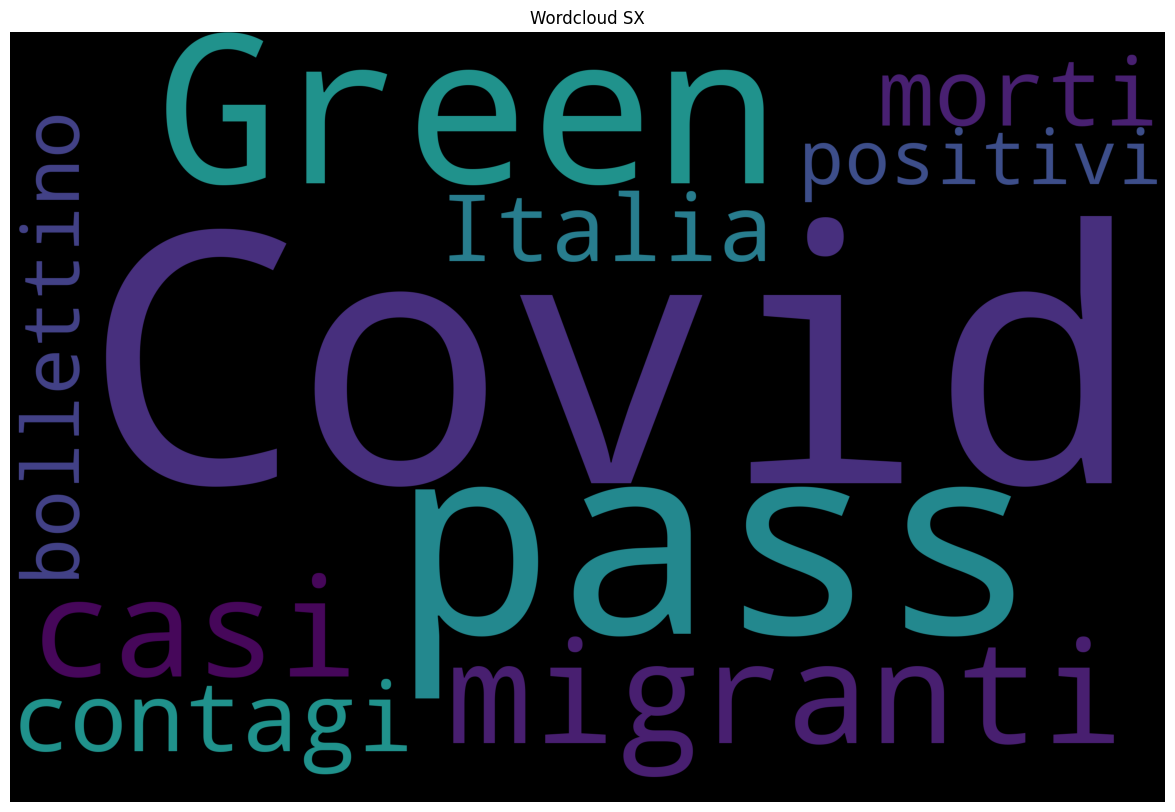

In [ ]:
from wordcloud import WordCloud

wc_SX = WordCloud(background_color="black",width=3000,height=2000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wcSX)
plt.axis('off')
plt.title('Wordcloud SX')
plt.imshow(wc_SX)

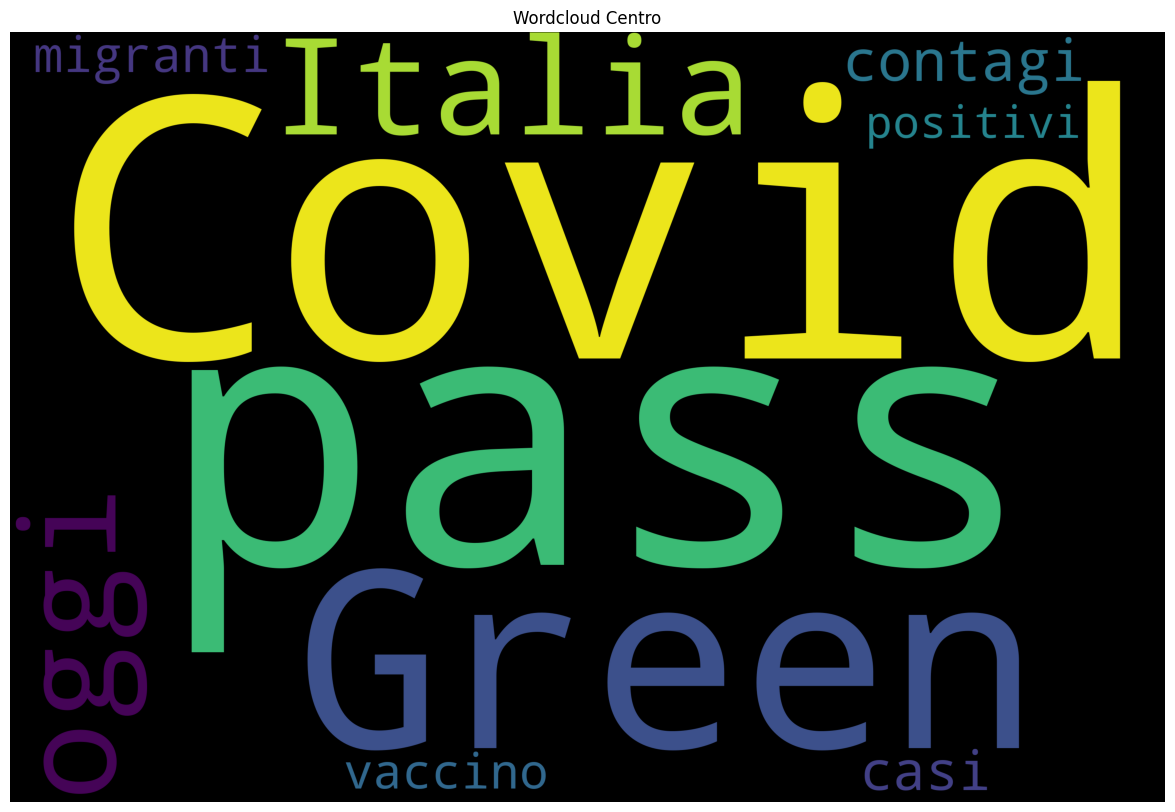

In [ ]:
wc_C = WordCloud(background_color="black",width=3000,height=2000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wcC)
plt.axis('off')
plt.title('Wordcloud Centro')
plt.imshow(wc_C)

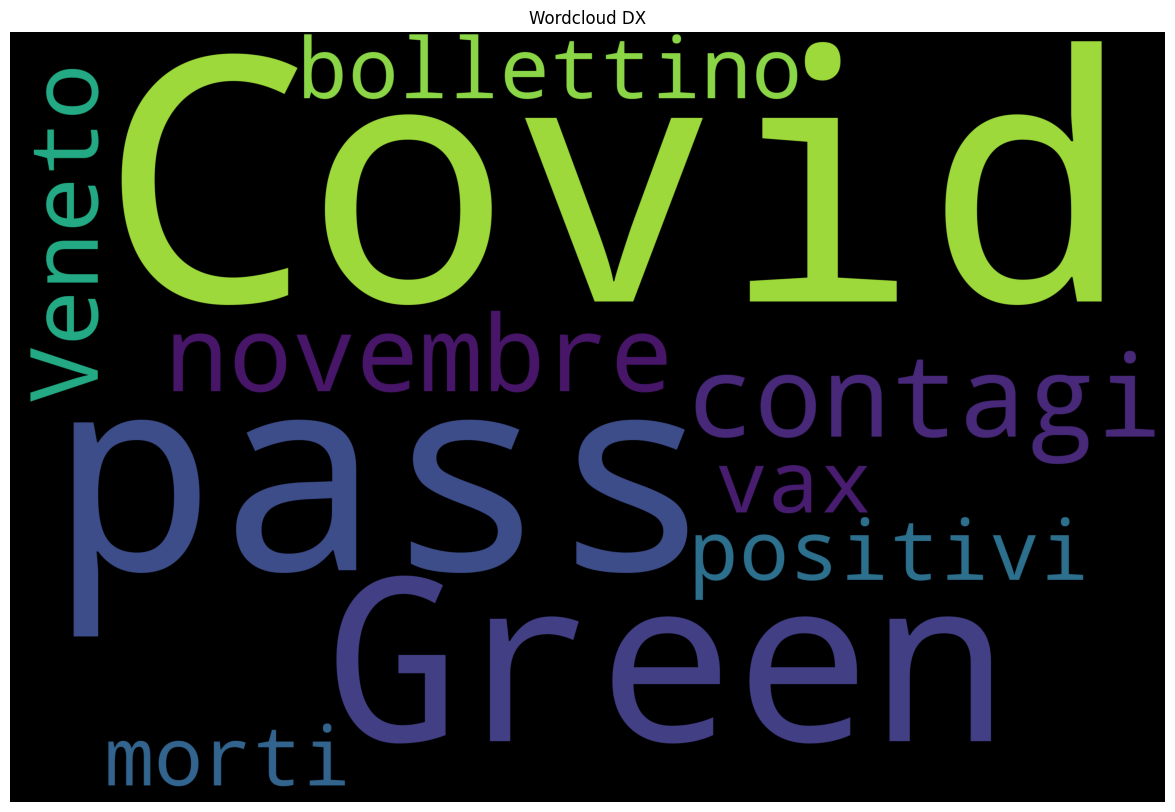

In [ ]:
wc_DX = WordCloud(background_color="black",width=3000,height=2000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wcDX)
plt.axis('off')
plt.title('Wordcloud DX')
plt.imshow(wc_DX)

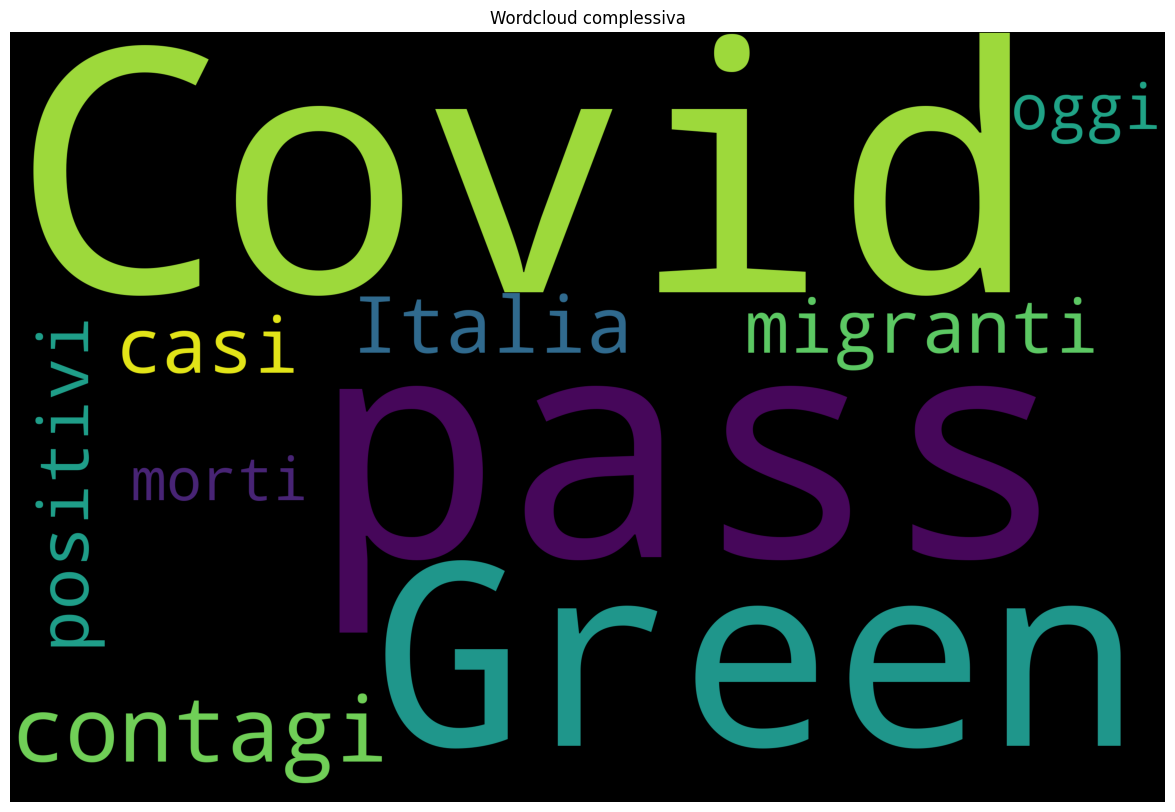

In [ ]:
wc_Sum = WordCloud(background_color="black",width=3000,height=2000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wcSum)
plt.axis('off')
plt.title('Wordcloud complessiva')
plt.imshow(wc_Sum)

# Activity

Number of total Tweets by source

In [ ]:
index_q = [0,0,0,0,0,-1,1,-1,1,1,-1,-1,0,-1,-1,-1,1,1,0,0,1,1,1,0,-1]

df_activity = pd.DataFrame(merge_df, columns=["source","index"])
df_activity.columns = ['source','tweet count']
merge_activity = df_activity.groupby('source').count()
merge_activity['index'] = index_q
merge_activity.sort_values(by=['tweet count'], ascending=False)

,tweet count,index
source,,
adnkronos,430,0
mediasettgcom24,417,0
repubblica,210,-1
gazzettino,185,1
ilmessaggeroit,181,-1
agenzia_ansa,157,0
lastampa,146,-1
fattoquotidiano,138,-1
huffpostitalia,127,-1


Total sum of Favourite counts by source

In [ ]:
fc_activity = pd.DataFrame(merge_df, columns=['source','fav_count'])
fc_activity.columns = ['source','favourite count']
fc_activity = fc_activity.groupby('source')['favourite count'].sum()
fc_activity = pd.DataFrame(fc_activity)
fc_activity['index'] = index_q
fc_activity.sort_values(by=['favourite count'], ascending=False)

,favourite count,index
source,,
mediasettgcom24,13551,0
agenzia_ansa,8767,0
adnkronos,8320,0
huffpostitalia,7976,-1
fattoquotidiano,3737,-1
repubblica,3689,-1
corriere,2481,0
lastampa,2432,-1
laveritaweb,2345,1


Total sum of Retweet counts by source

In [ ]:
rc_activity = pd.DataFrame(merge_df, columns=['source','retw_count'])
rc_activity.columns = ['source','retweet count']
rc_activity = rc_activity.groupby('source')['retweet count'].sum()
rc_activity = pd.DataFrame(rc_activity)
rc_activity['index'] = index_q
rc_activity.sort_values(by=['retweet count'], ascending=False)

,retweet count,index
source,,
mediasettgcom24,3590,0
adnkronos,3143,0
agenzia_ansa,2768,0
huffpostitalia,1956,-1
fattoquotidiano,1903,-1
repubblica,1335,-1
laveritaweb,871,1
lastampa,711,-1
libero_official,569,1


Retrieving followers, sources index and activity data for the big following table

In [ ]:
followers_list = [{"adnkronos":578989, "agenzia_ansa":1700000, "agenzia_italia":241421, "avvenire_nei":101422, "corriere":2500000, "fattoquotidiano":2100000, "gazzettino":70693, "huffpostitalia":630162, "ilfoglio_it":251246, "ilgiornale":567738, "ilmanifesto":205146, "ilmessaggeroit": 494178, "ilpost":700184, "ilriformista":22699, "internazionale":1300000, "lastampa":1200000, "laveritaweb":175641, "libero_official":314275, "mattinodinapoli":275058, "mediasettgcom24":1300000, "qn_carlino":53983, "qn_giorno":15418, "qn_lanazione":60602, "rainews":1200000, "repubblica":3300000}]
fw_list = [578989,1700000,241421,101422,2500000,2100000,70693,630162,251246,567738,205146,494178,700184,22699,1300000,1200000,175641,314275,275058,1300000,53983,15418,60602,1200000,3300000]

In [ ]:
merge_activity['fav_count sum'] = fc_activity['favourite count'].tolist()
merge_activity['retw_count sum'] = rc_activity['retweet count'].tolist()
merge_activity['followers count'] = fw_list

In [ ]:
interaction = []
for i in range(0,25):
    calc = (merge_activity['fav_count sum'][i]+merge_activity['retw_count sum'][i])/merge_activity['tweet count'][i]
    interaction.append(calc)

merge_activity['interaction'] = interaction
merge_activity['index'] = index_q

Activity report

In [ ]:
merge_activity.sort_values(by=['interaction'], ascending=False)

,tweet count,index,fav_count sum,retw_count sum,followers count,interaction
source,,,,,,
laveritaweb,8,1,2345,871,175641,402.000000
huffpostitalia,127,-1,7976,1956,630162,78.204724
agenzia_ansa,157,0,8767,2768,1700000,73.471338
corriere,60,0,2481,506,2500000,49.783333
libero_official,51,1,1887,569,314275,48.156863
ilmanifesto,11,-1,345,156,205146,45.545455
mediasettgcom24,417,0,13551,3590,1300000,41.105516
fattoquotidiano,138,-1,3737,1903,2100000,40.869565
avvenire_nei,40,0,958,399,101422,33.925000


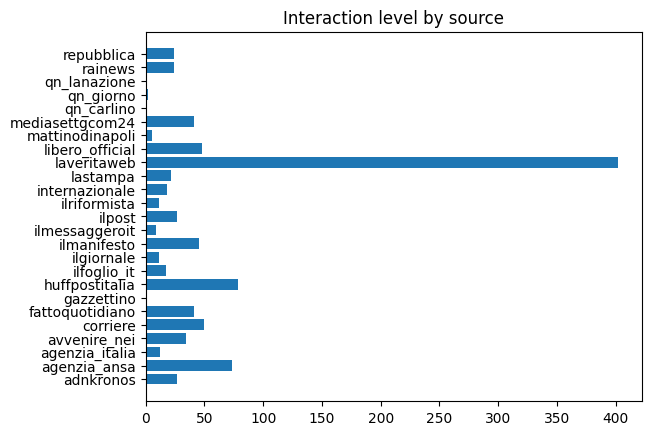

In [ ]:
sources = sorted(list(merge_df['source'].unique()))
y = merge_activity['interaction']

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(sources, y, align='center')

ax.set_xlabel('')
ax.set_title('Interaction level by source')

plt.show()

Activity report by Index

In [ ]:
totSX = merge_activity[merge_activity["index"]==-1]
totC = merge_activity[merge_activity["index"]==0]
totDX = merge_activity[merge_activity["index"]==1]

In [ ]:
totSX.sort_values(by=['interaction'], ascending=False)

,tweet count,index,fav_count sum,retw_count sum,followers count,interaction
source,,,,,,
huffpostitalia,127,-1,7976,1956,630162,78.204724
ilmanifesto,11,-1,345,156,205146,45.545455
fattoquotidiano,138,-1,3737,1903,2100000,40.869565
repubblica,210,-1,3689,1335,3300000,23.923810
lastampa,146,-1,2432,711,1200000,21.527397
internazionale,14,-1,183,74,1300000,18.357143
ilriformista,28,-1,218,104,22699,11.500000
ilmessaggeroit,181,-1,980,535,494178,8.370166


In [ ]:
#print('Interaction mean: ',totSX['interaction'].mean())
#print('Interaction median: ',totSX['interaction'].median())

#print('Fav_count mean: ',totSX['fav_count sum'].mean())
#print('Fav_count median: ',totSX['fav_count sum'].median())

#print('Retw_count mean: ',totSX['retw_count sum'].mean())
#print('Retw_count median: ',totSX['retw_count sum'].median())

In [ ]:
totC.sort_values(by=['interaction'], ascending=False)

,tweet count,index,fav_count sum,retw_count sum,followers count,interaction
source,,,,,,
agenzia_ansa,157,0,8767,2768,1700000,73.471338
corriere,60,0,2481,506,2500000,49.783333
mediasettgcom24,417,0,13551,3590,1300000,41.105516
avvenire_nei,40,0,958,399,101422,33.925000
adnkronos,430,0,8320,3143,578989,26.658140
ilpost,27,0,575,135,700184,26.296296
rainews,37,0,609,266,1200000,23.648649
agenzia_italia,28,0,210,120,241421,11.785714
mattinodinapoli,64,0,262,66,275058,5.125000


In [ ]:
#print('Interaction mean: ',totC['interaction'].mean())
#print('Interaction median: ',totC['interaction'].median())

#print('Fav_count mean: ',totC['fav_count sum'].mean())
#print('Fav_count median: ',totC['fav_count sum'].median())

#print('Retw_count mean: ',totC['retw_count sum'].mean())
#print('Retw_count median: ',totC['retw_count sum'].median())

In [ ]:
totDX.sort_values(by=['interaction'], ascending=False)

,tweet count,index,fav_count sum,retw_count sum,followers count,interaction
source,,,,,,
laveritaweb,8,1,2345,871,175641,402.000000
libero_official,51,1,1887,569,314275,48.156863
ilfoglio_it,44,1,605,165,251246,17.500000
ilgiornale,50,1,436,120,567738,11.120000
qn_giorno,65,1,99,41,15418,2.153846
gazzettino,185,1,151,80,70693,1.248649
qn_lanazione,86,1,51,30,60602,0.941860
qn_carlino,82,1,29,32,53983,0.743902


In [ ]:
#print('Interaction mean: ',totDX['interaction'].mean())
#print('Interaction median: ',totDX['interaction'].median())

#print('Fav_count mean: ',totDX['fav_count sum'].mean())
#print('Fav_count median: ',totDX['fav_count sum'].median())

#print('Retw_count mean: ',totDX['retw_count sum'].mean())
#print('Retw_count median: ',totDX['retw_count sum'].median())

In [ ]:
sumDF = {'Tweet count sum': [totSX['tweet count'].sum(),totC['tweet count'].sum(),totDX['tweet count'].sum()], 'Fav count sum': [totSX['fav_count sum'].sum(),totC['fav_count sum'].sum(),totDX['fav_count sum'].sum()], 'Retw count sum': [totSX['retw_count sum'].sum(),totC['retw_count sum'].sum(),totDX['retw_count sum'].sum()], 'Followers count': [totSX['followers count'].sum(),totC['followers count'].sum(),totDX['followers count'].sum()], 'Index':[-1,0,1]}
df1 = pd.DataFrame(data=sumDF)
df1

,Tweet count sum,Fav count sum,Retw count sum,Followers count,Index
0,855,19560,6774,9252185,-1
1,1260,35733,10993,8597074,0
2,571,5603,1908,1509596,1


In [ ]:
meansDF = {'Fav count mean': [totSX['fav_count sum'].mean(),totC['fav_count sum'].mean(),totDX['fav_count sum'].mean()], 'Retw count mean': [totSX['retw_count sum'].mean(),totC['retw_count sum'].mean(),totDX['retw_count sum'].mean()], 'Interaction mean': [totSX['interaction'].mean(),totC['interaction'].mean(),totDX['interaction'].mean()], 'Index':[-1,0,1]}
df2 = pd.DataFrame(data=meansDF)
df2

,Fav count mean,Retw count mean,Interaction mean,Index
0,2445.000000,846.750000,31.037282,-1
1,3970.333333,1221.444444,32.422109,0
2,700.375000,238.500000,60.483140,1


In [ ]:
mediansDF = {'Fav count median': [totSX['fav_count sum'].median(),totC['fav_count sum'].median(),totDX['fav_count sum'].median()], 'Retw count median': [totSX['retw_count sum'].median(),totC['retw_count sum'].median(),totDX['retw_count sum'].median()], 'Interaction median': [totSX['interaction'].median(),totC['interaction'].median(),totDX['interaction'].median()], 'Index':[-1,0,1]}
df3 = pd.DataFrame(data=mediansDF)
df3

,Fav count median,Retw count median,Interaction median,Index
0,1706.0,623.0,22.725603,-1
1,958.0,399.0,26.658140,0
2,293.5,100.0,6.636923,1
